# Dataset link
https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india

In [288]:
import pandas as pd

# Loading dataset

In [289]:
df=pd.read_csv("D:\\MECS\\Internships\\Oasis Infobyte\\Datasets\\Unemployment in India.csv")

In [290]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [291]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [292]:
df.dropna(axis=0,inplace=True)

In [293]:
df[' Frequency'].unique()

array([' Monthly', 'Monthly'], dtype=object)

In [296]:
df.drop(columns=[' Frequency'],inplace=True)

In [294]:
df.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

## Converting the datatype of Date attribute

In [295]:
df[' Date']=pd.to_datetime(df[' Date'])
df[' Date']

0     2019-05-31
1     2019-06-30
2     2019-07-31
3     2019-08-31
4     2019-09-30
         ...    
749   2020-02-29
750   2020-03-31
751   2020-04-30
752   2020-05-31
753   2020-06-30
Name:  Date, Length: 740, dtype: datetime64[ns]

In [297]:
nums=df.select_dtypes(include='number')

# Checking for outliers

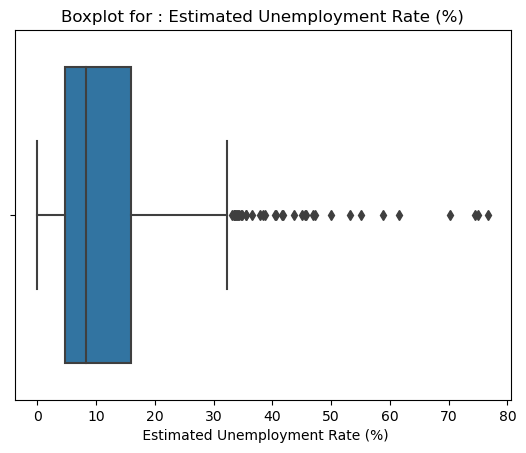

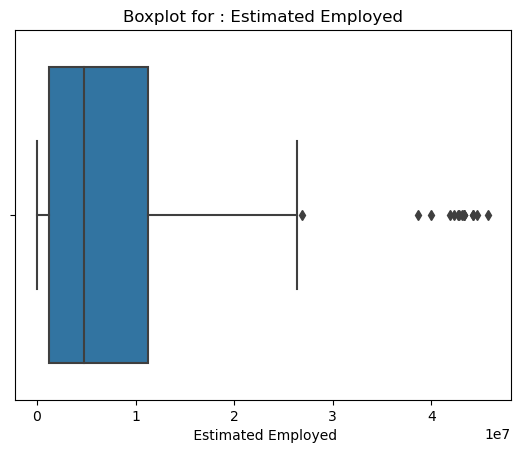

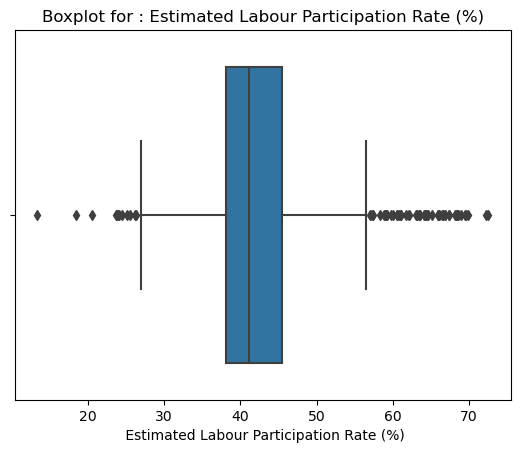

In [298]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in nums.columns:
    sns.boxplot(x=nums[i]) #for plotting boxplot of each attribute
    plt.title("Boxplot for :"  +i) #for giving name of the boxplot
    plt.show() #for showing the plot

## Removing outliers

In [299]:
for it in nums.columns:  
  Q1=nums[it].quantile(0.25) #25% quantile of the attribute
  Q3=nums[it].quantile(0.75) #75% quantile of the attribute
  IQR=Q3 - Q1 #interquartile range(difference of q1 and q3)
  lower_bound=Q1 - 1.5 * IQR #lower bound of the attribute
  upper_bound=Q3 + 1.5 * IQR #upper bound of the attribute


  lst=[] #list to store the non outliers
  for i in nums[it]: #checking all values in attribute
      if  (i>upper_bound):
            lst.append(upper_bound) #if number greater than upperbound then append previous upper bound
      elif (i<lower_bound):
          lst.append(lower_bound) #if number less than lower bound then append previous lower bound
      else:
          lst.append(i) # if number is between upper and lower append into list

  nums[it]=lst #update the column with non outliers

# Encoding Categorical varibles

In [300]:
cat=df.select_dtypes(exclude='number')

In [301]:
from sklearn import preprocessing
ordi = preprocessing.OrdinalEncoder()
new_cat = pd.DataFrame(ordi.fit_transform(cat),columns=cat.columns,index=cat.index)
new_cat

,Region,Date,Area
0,0.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,2.0,0.0
3,0.0,3.0,0.0
4,0.0,4.0,0.0
...,...,...,...
749,27.0,9.0,1.0
750,27.0,10.0,1.0
751,27.0,11.0,1.0
752,27.0,12.0,1.0


In [329]:
import pickle
pickle.dump(ordi,open('encoder.pkl','wb'))

# Standardizing the numerical attributes

In [302]:
from sklearn.preprocessing import StandardScaler
nums.drop(columns=[' Estimated Unemployment Rate (%)'],inplace=True)

scaler = StandardScaler()
std_num= pd.DataFrame(scaler.fit_transform(nums), 
                                    columns = nums.columns, 
                                    index = nums.index)

In [330]:
pickle.dump(scaler,open('scaling.pkl','wb'))

In [303]:
new_df=pd.concat([new_cat,std_num,df[' Estimated Unemployment Rate (%)']],axis=1)

In [304]:
new_df

,Region,Date,Area,Estimated Employed,Estimated Labour Participation Rate (%),Estimated Unemployment Rate (%)
0,0.0,0.0,0.0,0.736630,0.160169,3.65
1,0.0,1.0,0.0,0.701541,-0.019894,3.05
2,0.0,2.0,0.0,0.749262,0.199510,3.75
3,0.0,3.0,0.0,0.777965,0.270627,3.32
4,0.0,4.0,0.0,0.773792,0.378060,5.17
...,...,...,...,...,...,...
749,27.0,9.0,1.0,0.573924,0.288785,7.55
750,27.0,10.0,1.0,0.564539,0.175300,6.67
751,27.0,11.0,1.0,0.347211,-0.148510,15.63
752,27.0,12.0,1.0,0.338764,-0.228706,15.22


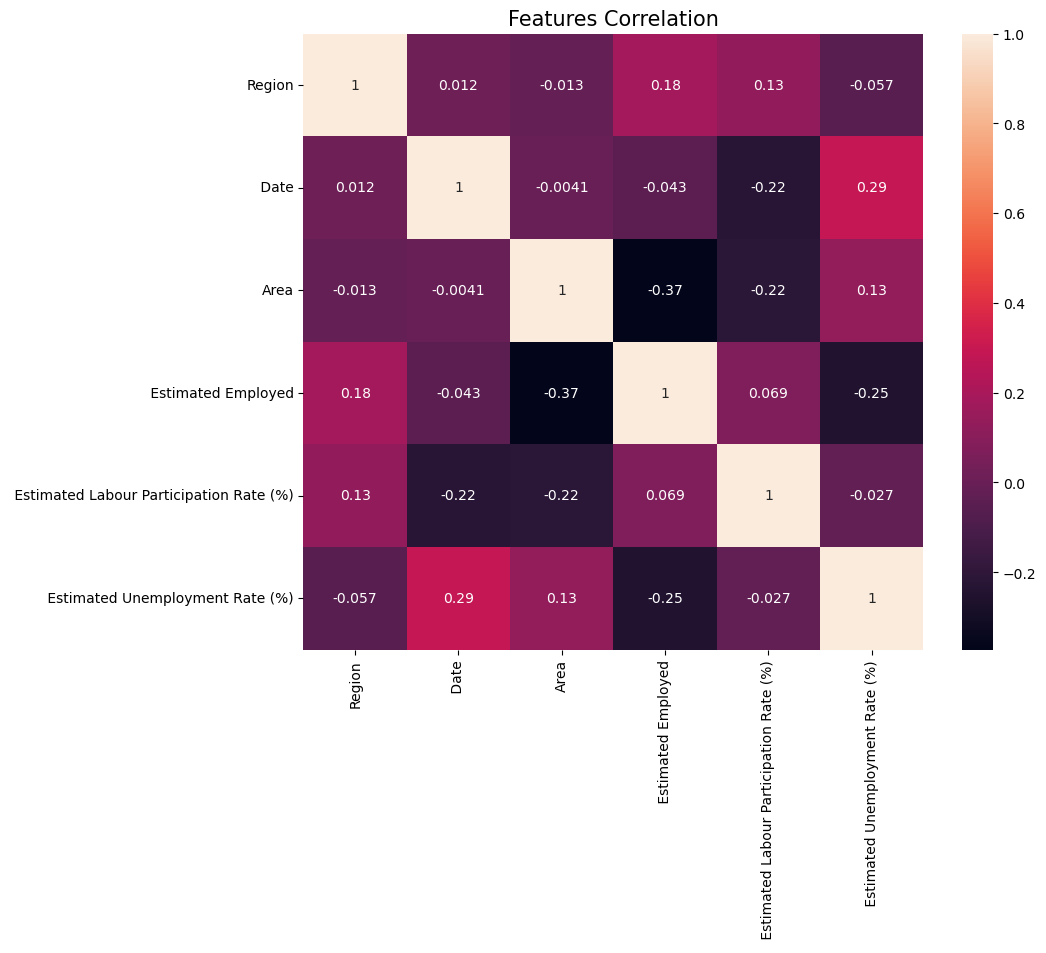

In [305]:
plt.figure(figsize=(10,8))
corr = new_df.corr()
sns.heatmap(corr, annot=True)
plt.title("Features Correlation", fontsize = 15)
plt.show()

# Splitting for training and testing

In [306]:
x=new_df.drop(columns=[' Estimated Unemployment Rate (%)'])
y=new_df[' Estimated Unemployment Rate (%)']

In [307]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

# Linear, lasso and ridge regression

In [308]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Linear Regression
regressor = LinearRegression()
# Lasso Regression
lasso = Lasso()
# Ridge Regression
ridge = Ridge()

# Fitting models on Training data 
regressor.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Making predictions on Test data
y_pred_lr = regressor.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

In [309]:
from sklearn import metrics
import numpy as np

print("Model\t\t\t RMSE \t\t MSE \tMAE \t\t MAPE \t\t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)),metrics.mean_squared_error(y_test, y_pred_lr),metrics.mean_absolute_error(y_test, y_pred_lr),metrics.mean_absolute_percentage_error(y_test, y_pred_lr),metrics.r2_score(y_test, y_pred_lr)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)),metrics.mean_squared_error(y_test, y_pred_lasso),metrics.mean_absolute_error(y_test, y_pred_lasso),metrics.mean_absolute_percentage_error(y_test, y_pred_lasso), metrics.r2_score(y_test, y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)),metrics.mean_squared_error(y_test, y_pred_ridge),metrics.mean_absolute_error(y_test, y_pred_ridge),metrics.mean_absolute_percentage_error(y_test, y_pred_ridge), metrics.r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 MSE 	MAE 		 MAPE 			 R2
LinearRegression 	 8.85 		 78.28 	6.61 	692121309306804.75 		0.16
LassoRegression 	 8.93 		 79.73 	6.64 	761425685012199.25 		0.14
RidgeRegression 	 8.85 		 78.27 	6.61 	692806231031491.62 		0.16


# KNN regressor

In [310]:
from sklearn.neighbors import KNeighborsRegressor
regressor_knn = KNeighborsRegressor()
regressor_knn.fit(X_train, y_train)

KNeighborsRegressor()

In [311]:
y_test_pred = regressor_knn.predict(X_test)

In [312]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
#showing only 5 rows
temp_df.head()

,Actual,Predicted
583,6.67,5.222
327,8.12,12.458
277,0.92,2.600
19,4.65,5.728
437,8.21,11.388


In [313]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print('Mean Absolute percentage Error: ', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

print("R-Square is",metrics.r2_score(y_test,y_test_pred))

Mean Absolute Error:  5.339477477477478
Mean Squared Error:  63.68055809009009
Root Mean Squared Error:  7.980009905387968
Mean Absolute percentage Error:  525744540283486.25
R-Square is 0.3147212827032123


# Decision Tree Regressor

In [314]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor()
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [315]:
y_test_pred = regressor_dt.predict(X_test)

In [316]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
#showing only 5 tuples
temp_df.head()

,Actual,Predicted
583,6.67,7.57
327,8.12,6.06
277,0.92,0.97
19,4.65,5.08
437,8.21,3.57


In [317]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print('Mean Absolute percentage Error: ', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

print("R-Square is",metrics.r2_score(y_test,y_test_pred))

Mean Absolute Error:  4.867927927927927
Mean Squared Error:  79.77327657657656
Root Mean Squared Error:  8.931588692756545
Mean Absolute percentage Error:  530491577728552.2
R-Square is 0.14154444799902766


# Random Forest regressor

In [318]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(X_train, y_train)

RandomForestRegressor()

In [319]:
y_test_pred = regressor_rf.predict(X_test)

In [320]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
583,6.67,6.9811
327,8.12,8.0604
277,0.92,2.7231
19,4.65,4.9190
437,8.21,10.1169


In [321]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print('Mean Absolute percentage Error: ', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

print("R-Square is",metrics.r2_score(y_test,y_test_pred))

Mean Absolute Error:  3.4444693693693686
Mean Squared Error:  38.40314244567566
Root Mean Squared Error:  6.197026903739862
Mean Absolute percentage Error:  323183989475853.56
R-Square is 0.5867364077100662


# Plotting accuracies

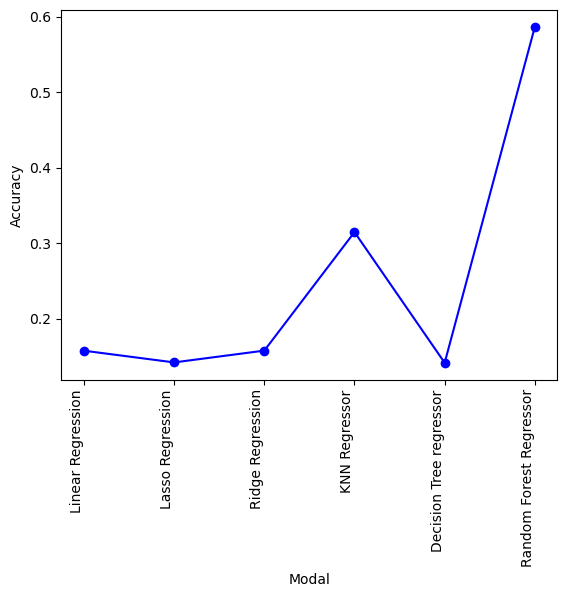

In [322]:
models = [regressor, lasso, ridge, regressor_knn, regressor_dt,regressor_rf]#storing all models in the list
names = ["Linear Regression", "Lasso Regression", "Ridge Regression", 
         "KNN Regressor","Decision Tree regressor","Random Forest Regressor"]#storing models names in the list
r2 = []#list to store the r2scores

for model in models:
    r2.append( (metrics.r2_score(y_test, model.predict(X_test)))) # append into the r2 values list

plt.plot(names,r2,'b-o',label='Accuracy over Different models');#plotting r2 with the line graph
plt.xticks(rotation=90,ha='right')#marking xticks with the model names
plt.xlabel('Modal')#labelling x axis
plt.ylabel('Accuracy')#labelling y axis

plt.show()#for showing the plot

# Among all algorithms Random forest regressor got more accuracy of 58%

# Pickling the algorithm(random forest)

In [336]:
pickle.dump(regressor_rf,open('rf.pkl','wb'))

In [337]:
model=pickle.load(open('regmodel.pkl','rb'))

In [338]:
pred=X_test.head(1)

In [339]:
model.predict(pred)

array([6.9811])

In [340]:
y_test.head(1)

583    6.67
Name:  Estimated Unemployment Rate (%), dtype: float64